###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2021 Semester 1

## Assignment 1: Pose classification with naive Bayes


**Student ID(s):**    1068299 Jiachen Li


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from collections import Counter

# Reading data from file and convert to dataframe while replacing 9999 to NaN
def preprocess(filename):
    return pd.read_csv(filename, header = None).replace(9999, np.NaN)

In [2]:
# Calculate prior probabilities and normal distribution of each attribute for each class
def train(data):
    model = []
    # Non-repeated class label list
    labels = sorted(list(set(data[data.columns[0]])))
    for label in labels:
        # Split to only take data from given class
        pose_data = data.loc[data[0] == label]
        pose_data = pose_data[pose_data.columns[1:]]
        mean_list = np.nanmean(pose_data, axis=0)
        std_list = np.nanstd(pose_data, axis=0)
        norm_list = []
        for i in range(len(mean_list)):
            norm_list.append(norm(mean_list[i], std_list[i]))
        prior = len(pose_data)/len(data)
        pose = [label, 
                prior,
                norm_list]
        model.append(pose)
    return model

In [3]:
# Predict labels of test set based on training model
def predict(test, model):
    predictions = []
    # drop labels from test set
    data = test[test.columns[1:]]
    for index, instance in data.iterrows():
        prediction = ""
        best_score = 0
        first = True
        # Calculate probabilities of each class
        for pose in model:
            # log prior probabilities
            score = np.log(pose[1])
            # sum up log of likelihood of features
            for i in range(len(instance)):
                # Ignore the missing features
                if np.isnan(instance.iloc[i]): 
                    continue
                else: 
                    score += pose[2][i].logpdf(instance.iloc[i])
            if first is True:
                best_score = score
                prediction = pose[0]
                first = False
            # Predict the highest socre class
            elif score > best_score:
                best_score = score
                prediction = pose[0]
        predictions.append(prediction)
    return predictions

In [4]:
# Evaluateing the predictions
def evaluate(data, predictions, test):
    truth = test[test.columns[0]]
    labels = sorted(list(set(data[data.columns[0]])))
    count = Counter(list(test[test.columns[0]]))
    total = len(predictions)
    # initialize  the error table
    error_table = {}
    for label in labels:
        # TP FN FP TN
        error_table[label] = [0,0,0,0]
    correct = 0
    for i in range(len(predictions)):
        if truth[i] == predictions[i]:
            # TP +1 for truth class and TN +1 for rest classes
            error_table[truth[i]][0] += 1
            for key, value in error_table.items():
                if key != truth[i]:
                    error_table[key][3] += 1
            correct+=1
        else:
            # FN +1 for truth class and FP +1 for predicted class
            error_table[truth[i]][1] +=1
            error_table[predictions[i]][2] +=1
    accuracy = correct/total
    macro_p = 0
    macro_r = 0
    micro_p_n = 0
    micro_p_d = 0
    micro_r_n = 0
    micro_r_d = 0
    weight_p = 0
    weight_r = 0
    f_score = {}
    # Calculate performance measurements based on error table
    for label in labels:
        tp = error_table[label][0]
        fn = error_table[label][1]
        fp = error_table[label][2]
        tn = error_table[label][3]
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        macro_p += precision
        macro_r += recall
        f_score[label] = 2*precision*recall /(precision+recall)
        micro_p_n += tp
        micro_p_d += tp+fp
        micro_r_n += tp
        micro_r_d += tp+fn
        weight_p += count[label]/total*precision
        weight_r += count[label]/total*recall
    # printing out the performance measurements results
    print("Overall Accuracy: " + str(accuracy))
    macro_p = macro_p/len(labels)
    macro_r = macro_r/len(labels)
    macro_f = 2*macro_p*macro_r / (macro_p+macro_r)
    print("\nMacro-averaging:")
    print("Precision: " + str(macro_p))
    print("Recall: " + str(macro_r))
    print("F-score: " + str(macro_f))
    micro_p = micro_p_n/micro_p_d
    micro_r = micro_r_n/micro_r_d
    micro_f = 2*micro_p*micro_r / (micro_p+micro_r)
    print("\nMicro-averaging:")
    print("Precision: " + str(micro_p))
    print('Recall: ' + str(micro_r))
    print("F-score: " + str(micro_f))
    weight_f = 2*weight_p*weight_r / (weight_p+weight_r)
    print("\nWeighted averaging:")
    print("Precision: " + str(weight_p))
    print('Recall: ' + str(weight_r))
    print("F-score: " + str(weight_f))
    x = []
    y = []
    # correspond count to f-score
    for label in labels:
        x.append(count[label])
        y.append(f_score[label])
    # printing out graph for question 1
    plt.title("F-score vs Instance count")
    plt.xlabel("Instance count of class in test set")
    plt.ylabel("F-socre of class")
    plt.scatter(x,y)
    plt.show()
    return

## Questions 


If you are in a group of 1, you will respond to **two** questions of your choosing.

If you are in a group of 2, you will respond to **four** questions of your choosing.

A response to a question should take about 100–250 words, and make reference to the data wherever possible.

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer should be submitted separately as a PDF.

### Q1
Since this is a multiclass classification problem, there are multiple ways to compute precision, recall, and F-score for this classifier. Implement at least two of the methods from the "Model Evaluation" lecture and discuss any differences between them. (The implementation should be your own and should not just call a pre-existing function.)

Overall Accuracy: 0.7413793103448276

Macro-averaging:
Precision: 0.719186507936508
Recall: 0.7371947496947497
F-score: 0.7280792923199401

Micro-averaging:
Precision: 0.7413793103448276
Recall: 0.7413793103448276
F-score: 0.7413793103448276

Weighted averaging:
Precision: 0.7504464285714286
Recall: 0.7413793103448274
F-score: 0.7458853150894136


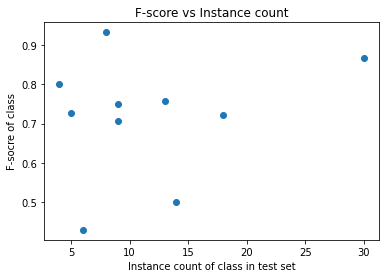

In [5]:
data = preprocess("train.csv")
model = train(data)
test = preprocess("test.csv")
predictions = predict(test, model)
evaluate(data, predictions, test)

### Q2
The Gaussian naıve Bayes classifier assumes that numeric attributes come from a Gaussian distribution. Is this assumption always true for the numeric attributes in this dataset? Identify some cases where the Gaussian assumption is violated and describe any evidence (or lack thereof) that this has some effect on the classifier’s predictions.

For example: point X2 column of bridge class has violated the Gaussian assumption with p-value of 0.0015149804530665278


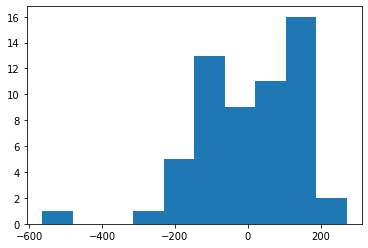

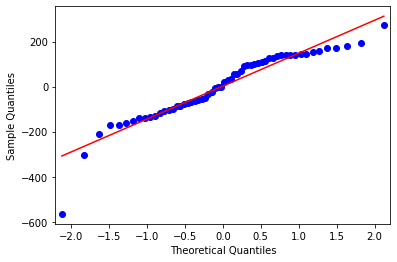

There have been 188 out of 220 attributes of classes that violated the Gaussian assumption


In [6]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Check if numeric attributes in dataset satisfy the Gaussian assumption
labels = sorted(list(set(data[data.columns[0]])))
count = 0
example = True
for label in labels:
    # Split to only take data from given class
    pose_data = data.loc[data[0] == label]
    pose_data = pose_data[pose_data.columns[1:]]
    for index, content in pose_data.items():
        content = content.dropna()
        stat, p = shapiro(content)
        # Reject H0 at alpha = 0.05
        if(p < 0.05):
            # Showing first non-Gaussian distribution as example
            if example:
                if index >= 11:
                    point = "Y" + str(index-10)
                else:
                    point = "X" + str(index+1)
                print("For example: point " + point + " column of "+ label + " class has violated the Gaussian assumption with p-value of " + str(p))
                plt.hist(content)
                plt.show()
                sm.qqplot(content, line ='s')
                plt.show()
                example = False
            count+=1
print("There have been " + str(count) + " out of " + str(len(labels)*22) + " attributes of classes that violated the Gaussian assumption")

### Q3
Implement a kernel density estimate (KDE) naive Bayes classifier and compare its performance to the Gaussian naive Bayes classifier. Recall that KDE has kernel bandwidth as a free parameter -- you can choose an arbitrary value for this, but a value in the range 5-25 is recommended. Discuss any differences you observe between the Gaussian and KDE naive Bayes classifiers. (As with the Gaussian naive Bayes, this KDE naive Bayes implementation should be your own and should not just call a pre-existing function.)

### Q4
Instead of using an arbitrary kernel bandwidth for the KDE naive Bayes classifier, use random hold-out or cross-validation to choose the kernel bandwidth. Discuss how this changes the model performance compared to using an arbitrary kernel bandwidth.

### Q5
Naive Bayes ignores missing values, but in pose recognition tasks the missing values can be informative. Missing values indicate that some part of the body was obscured and sometimes this is relevant to the pose (e.g., holding one hand behind the back). Are missing values useful for this task? Implement a method that incorporates information about missing values and demonstrate whether it changes the classification results.

### Q6
Engineer your own pose features from the provided keypoints. Instead of using the (x,y) positions of keypoints, you might consider the angles of the limbs or body, or the distances between pairs of keypoints. How does a naive Bayes classifier based on your engineered features compare to the classifier using (x,y) values? Please note that we are interested in explainable features for pose recognition, so simply putting the (x,y) values in a neural network or similar to get an arbitrary embedding will not receive full credit for this question. You should be able to explain the rationale behind your proposed features. Also, don't forget the conditional independence assumption of naive Bayes when proposing new features -- a large set of highly-correlated features may not work well.